# <font face="Verdana" size=6 color='#6495ED'> AN√ÅLISE ESTAT√çSTICA DE DADOS

<font face="Verdana" size=3 color='#40E0D0'> Profs. Larissa Driemeier e Arturo Forner-Cordero

<center><img src='https://drive.google.com/uc?export=view&id=1CJsooGWXxTqWw0VeGAoroNb509nYKiRK' width="800"></center>

Este notebook faz parte da aula [07](https://alunoweb.net/moodle/pluginfile.php/113365/mod_resource/content/2/Aula06_Probabilidade.pdf) do curso IAD-001.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Modelo Probabil√≠stico

Todo fen√¥meno ou experimento que envolva um elemento aleat√≥rio tem seu *modelo probabil√≠stico* determinado, quando estabelecemos:

* __Um espa√ßo amostral, $\Omega$__ No caso de uma vari√°vel discreta, o espa√ßo amostral √© a enumera√ß√£o de todos os resultados poss√≠veis do experimento:
$$\Omega = {\omega_1, \omega_2, \cdots, \omega_n}$$

 Cada resultado poss√≠vel $\omega_i$ √© um *ponto amostral*.

 Um exemplo simples √© jogar uma moeda, enquanto observa se sai cara ou coroa. Um exemplo onde a vari√°vel √© real √© a observa√ß√£o de uma temperatura.

* __Uma probabilidade, $P(\omega_i)$__ Para cada ponto amostral, podemos considerar a probabilidade como uma fun√ß√£o que recebe um elemento do espa√ßo amostral e mapeia o resultado para um n√∫mero real n√£o negativo e menor ou igual a 1.
<center><img src='https://drive.google.com/uc?export=view&id=1cntVIIs8pSXYLQo1ybLuWXtMsDphEjP3' width="300"></center>


__Observa√ß√£o direta__

Joga-se o dado $n$ vezes e conta-se o n√∫mero $f_i$ de vezes em que ocorre cada face $i$, $ùëñ = 1, 2, 3, 4, 5, 6$.

As propor√ß√µes $f_i/n$ determinam a distribui√ß√£o de frequ√™ncias do fen√¥meno.

Se jogarmos o dado um n√∫mero $n'$ vezes teremos outra distribui√ß√£o de frequ√™ncias, mas com um padr√£o que esperamos ser muito pr√≥ximo ao anterior.

__Modelo te√≥rico__

Mesmo sem observar diretamente o fen√¥meno √© poss√≠vel criar um modelo te√≥rico, que reproduza bem a distribui√ß√£o das frequ√™ncias que se verifica quando se observa o pr√≥prio fen√¥meno.

Por exemplo, no lan√ßamento de um dado, as suposi√ß√µes te√≥ricas s√£o:
* s√≥ podem ocorrer 6 faces;
* o dado √© perfeitamente equilibrado;
* cada face deve ocorrer o mesmo n√∫mero de vezes na propor√ß√£o de $1/6$.




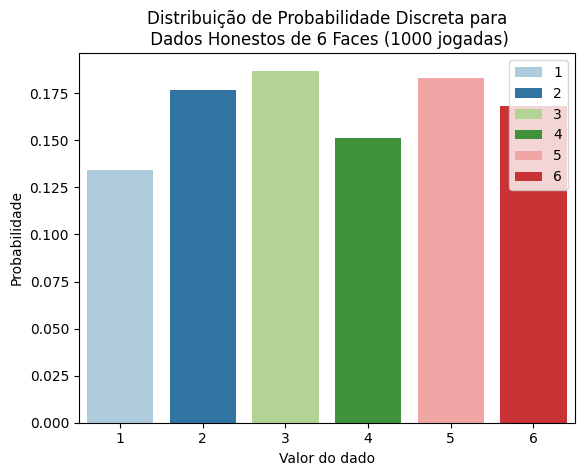

In [2]:
num_rolls = 1000

values = [1, 2, 3, 4, 5, 6]
sample = np.random.choice(values, num_rolls)

# Numpy arrays contagens para cada lado
side, count = np.unique(sample, return_counts=True)
probs = count / len(sample)

# Plotando resultados
sns.color_palette("tab10")
sns.barplot(x=side, y=probs, hue = values, palette="Paired")
plt.title(
    f'Distribui√ß√£o de Probabilidade Discreta para\n Dados Honestos de 6 Faces ({num_rolls} jogadas)')
plt.ylabel('Probabilidade')
plt.xlabel('Valor do dado')
plt.show()

# Probabilidade Condicionada

Em muitos casos, estamos interessados ‚Äã‚Äãna probabilidade de algum evento, dado que algum outro evento aconteceu. Isso √© chamado de __probabilidade condicionada__.

Denotamos a probabilidade condicional de que um evento $H$ (de *Hip√≥tese*)  ocorra dado que o evento $E$ (de *Evid√™ncia*) aconteceu como:

$$
\color{orange}{p(H|E)=p(H) \frac{p(E|H)}{p(E)}\tag{1}}
$$

A probabilidade condicional tamb√©m pode ser dada por:

$$\color{orange}{P(H  | E) = \frac{P( H \cap E)}{P(E)} \tag{2}}$$

Embora $P(E)$ apare√ßa na f√≥rmula, geralmente √© poss√≠vel calcular
$$\color{orange}{P(E) = \sum_i P(E | H_i) P(H_i) \tag{3}} $$,
sendo $H_i$ cada subespa√ßo amostral.

A f√≥rmula √© bastante √∫til em caso de incerteza do evento. Por exemplo, se eu perguntar: Voc√™ acha que vou caminhar at√© o meu local de trabalho? Inicialmente, voc√™ pode *chutar*  algo como uma probabilidade de $40%$ de que eu v√° caminhar at√© meu local de trabalho. No entanto, se eu te der informa√ß√µes adicionais, como minha casa fica a dez minutos de caminhada do meu local de trabalho, a probabilidade de que eu realmente v√° caminhar torna-se alta. Se, pelo contr√°rio, eu disser que minha casa fica a mais de 6 km do meu escrit√≥rio, a probabilidade de que eu caminhe at√© l√° se torna pequena. Isso √© a probabilidade condicional, a probabilidade de que eu caminhe at√© meu local de trabalho, dado que meu local de trabalho fica a dez minutos de caminhada da minha casa.

$p(H)$ a priori: reflete nossa cren√ßa, o que sabemos sobre o valor do par√¢metro de interesse antes de olhar para os dados. Em nosso exemplo anterior, este √© nosso palpite inicial de 40% de chance de eu caminhar at√© meu local de trabalho.

$p(E|H)$ verossimilhan√ßa: probabilidade de observar a evid√™ncia quando nossa hip√≥tese $H$ est√° correta. Em outras palavras: qual √© a probabilidade de observar nossos dados, dada nossa cren√ßa inicial (ou hip√≥tese)? Em nosso exemplo, a evid√™ncia √© a dist√¢ncia entre minha casa e o escrit√≥rio. Qual √© a probabilidade de que meu local de trabalho esteja a apenas dez minutos de caminhada da minha casa, se eu for caminhando at√© meu local de trabalho?

$p(H|E)$ a posteriori: este √© o resultado da an√°lise bayesiana: cont√©m todo o nosso conhecimento sobre um certo problema, reunindo nosso modelo e nossos dados. Em nosso exemplo, qual √© a probabilidade de eu caminhar at√© meu local de trabalho, dado que meu local de trabalho est√° a dez minutos de caminhada da minha casa?

$p(E)$ evid√™ncia: probabilidade marginal de observar nossos dados em qualquer situa√ß√£o poss√≠vel, independentemente de nossa hip√≥tese. √â conhecida como fator de normaliza√ß√£o, porque garante que a probabilidade a posteriori esteja entre $0-1$.

<img src='https://drive.google.com/uc?export=view&id=12sA6tTqj-4utAM1rrIg3BjphI3knO9Ob' width="700">

Como $p(E)$ √© um fator de normaliza√ß√£o,
$$
\color{orange}{p(H|E) \propto p(E|H) * p(H)\tag{4}}
$$




## Aplica√ß√£o direta da f√≥rmula

In [3]:
def bayes(P_A, P_B,P_B_dado_A):
	P_A_dado_B = P_A * (P_B_dado_A ) / P_B
	return P_A_dado_B

### Potes de biscoito

S√£o 2 potes de biscoito:
* O pote 1 tem 30 biscoitos de baunilha e 10 biscoitos de chocolate;
* O pote 2 tem 20 biscoitos de baunilha e 20 biscoitos de chocolate.

Voc√™ escolhe aleatoriamente um biscoito de um pote escolhido aleatoriamente. √â de baunilha. Qual √© a probabilidade de ser do pote 1?

Procuramos, portanto,
$$P(Pote\text{ }01|Baunilha) = P(Pote\text{ }01) \frac{P(Baunilha |Pote\text{ }01)}{P(Baunilha)}$$

In [5]:
# probabilidade de escolher entre o Pote 1 e 2: a priori
p_pote_1 = 1/2

# baunilha / total de biscoitos: verossimilhan√ßa
p_baunilha_dado_pote_1 = 30/(30+10)

# total de biscoitos de baunilha / Total  de biscoitos: marginal
p_baunilha = (30+20) / (30+10 + 20+20)

# Bayes
p_pote_1_dado_baunilha = bayes(p_pote_1,p_baunilha,p_baunilha_dado_pote_1)

print('P(Pote 1 | Baunilha) = {:2.2f}%'.format(p_pote_1_dado_baunilha*100))

P(Pote 1 | Baunilha) = 60.00%


### Reparos em linha de produ√ß√£o
M√°rio √© respons√°vel por uma linha de produ√ß√£o automatizada, e recorre a companhias parceiras para fazerem reparos quando ocorrem falhas. A companhia A atende 20% das avarias e faz um reparo incompleto 1 vez em 20. A companhia B atende 60% das avarias e faz um reparo incompleto 1 vez em 10. A companhia C que atende 15% das avarias e faz uma reparo incompleto 1 vez em 10. A companhia D atende 5% das quebras e faz um reparo incompleto 1 vez em 20.

Para o pr√≥ximo problema com a linha de produ√ß√£o diagnosticada como sendo devido a um reparo inicial incompleto, qual √© a probabilidade que M√°rio tenha contratado a companhia A para esse reparo inicial?

In [ ]:
# P(A), P(B), P(C), P(D)
P_A = 0.20
P_B = 0.60
P_C = 0.15
P_D = 0.05

# P(B|A)
P_I_dado_A = 1/20
P_I_dado_B = 1/10
P_I_dado_C = 1/10
P_I_dado_D = 1/20


# P(B)
P_I = P_I_dado_A * P_A + P_I_dado_B * P_B + P_I_dado_C * P_C + P_I_dado_D * P_D

In [ ]:
# C√°lculo de P(A|I)
resultado = bayes(P_A, P_I,P_I_dado_A)
# Sua resposta ao M√°rio
print('M√°rio.... ')
print('A probabilidade de voc√™ ter contratado a companhia A √© de {:6.2f}%'.format(resultado * 100))

### Problema de M√°rio

M√°rio faz um exame para detectar uma rara e grave doen√ßa, que atinge 0,1% da popula√ß√£o.

O m√©dico informa que o falso positivo do exame √© de 1%, ou seja, apenas 1% das pessoas saud√°veis recebem erradamente a indica√ß√£o, pelo exame, de que est√£o com a doen√ßa. Por outro lado, se o paciente tem a doen√ßa, o exame d√° positivo em 99% dos casos.

O resultado do exame de M√°rio √© positivo. Ele se desespera, achando que tem 99% de chance de estar com a doen√ßa.

Voc√™ tem algo a dizer para ele?

In [ ]:
# P(Do|Pos)
# P(Do)
P_Do = 0.1/100
P_nDo = 1 - P_Do

# P(Pos|Do)
P_Pos_dado_Do = 99/100
# P(Pos|nDo)
P_Pos_dado_nDo = 1/100

# P(Pos)
P_Pos = P_Pos_dado_Do * P_Do + P_Pos_dado_nDo * P_nDo

In [ ]:
# C√°lculo de P(Do|Pos)
resultado = bayes(P_Do, P_Pos,P_Pos_dado_Do)
# Sua resposta ao M√°rio
print('M√°rio, A situa√ß√£o n√£o √© t√£o ruim assim.... ')
print('A probabilidade de voc√™ estar coma  doen√ßa, dado que seu exame deu positivo √© de {:6.2f}%'.format(resultado * 100))

M√°rio, A situa√ß√£o n√£o √© t√£o ruim assim.... 
A probabilidade de voc√™ estar coma  doen√ßa, dado que seu exame deu positivo √© de   9.02%


### Problema do Spam
O M√°rio, que nunca teve a doen√ßa do problema anterior, est√° usando um novo software para detectar spam: **SpamAssassin**.

O SpamAssassin √© um sistema inteligente, que analisa cada mensagem que chega no servidor, e atrav√©s de regras pr√≥prias, determina se o e-mail √© um SPAM ou n√£o. O programa √© treinado pelos usu√°rios. Ele procura padr√µes nas palavras dos e-mails marcados como spam pelo usu√°rio. O software √© atualizado regularmente, para que novas regras entrem no sistema, e passem a detectar os SPAMs com maior precis√£o.

Por exemplo, o software pode ter aprendido que a palavra ‚ÄúRolex" aparece em 10% dos e-mails marcados como spam. Supondo que 0,1% dos e-mails n√£o spam incluam a palavra ‚ÄúRolex" e 50% de todos os e-mails recebidos pelo usu√°rio s√£o spam, encontre a probabilidade de um e-mail ser spam se a palavra ‚ÄúRolex" aparecer nele.

In [ ]:
# P(A) e P(nA)
P_Spam = 0.50
P_nSpam = 1 - P_Spam

# P(B|A)
P_Rolex_dado_Spam = 0.10
P_Rolex_dado_nSpam = 0.001

#P(B)
P_Rolex = P_Rolex_dado_Spam * P_Spam + P_Rolex_dado_nSpam * P_nSpam

In [ ]:
# C√°lculo de P(Spam|Free)
resultado = bayes(P_Spam, P_Rolex,P_Rolex_dado_Spam)
# Sua resposta
print('A probabilidade de M√°rio ter recebido um spam √© de {:6.2f}%'.format(resultado * 100))

## Mais exemplos

### Novo teste de laborat√≥rio

Agora usaremos a f√≥rmula no contexto de um exemplo mais realista. Uma equipe de bi√≥logos quer medir a efici√™ncia de um novo teste de HIV que eles desenvolveram (o HIV √© um v√≠rus que causa a AIDS, uma doen√ßa que afeta o sistema imunol√≥gico). Eles usaram o novo m√©todo para testar 53 pessoas, e os resultados est√£o resumidos na tabela abaixo:

$\text{ }$     | HIV | HIV$^C$ | Total
---   | --- | ---     | ---
T$^+$ |21   | 24      | 45
T$^-$ |2    | 6       | 8
Total |23   | 30      | 53


Lendo a tabela acima, podemos ver que:

* 23 pessoas est√£o infectadas com HIV;
* 30 pessoas n√£o est√£o infectadas pelo HIV (HIV$^C$ significa n√£o infectado pelo HIV ‚Äì lembre-se dos slides,  que o "C" sobrescrito indica o complemento);
* 45 pessoas testaram positivo para HIV;
* 8 pessoas testaram negativo para HIV;
* Das 23 pessoas infectadas, 21 testaram positivo (diagn√≥stico correto);
* Das 30 pessoas n√£o infectadas, 24 testaram positivo (diagn√≥stico errado).

A equipe agora pretende usar esses resultados para calcular as probabilidades de novos pacientes e descobrir se o teste √© confi√°vel o suficiente para ser usado em hospitais. Eles querem saber:

* Qual √© a probabilidade de resultado positivo, dado que um paciente est√° infectado pelo HIV?
* Qual √© a probabilidade de resultado negativo, dado que um paciente n√£o est√° infectado pelo HIV?

$P(T^+|HIV)$ √© a probabilidade de teste positivo, dado que o paciente est√° infectado pelo HIV, e, de acordo com a f√≥rmula, temos:

\begin{equation}
P(T^+|HIV) = \frac{P(T^+ \cap HIV)}{P(HIV)}
\end{equation}

Existem 23 pessoas infectadas com HIV, o que significa $P(HIV) = \frac{23}{53}$. Das 23 pessoas infectadas com HIV, 21 tamb√©m testaram positivo, o que significa $P(T^+ \cap HIV) = \frac{21}{53}$.

Isso significa que $P(T^+|HIV)$ √©:

\begin{equation}
P(T^+|HIV) = \frac{21}{23} = 0.9130
\end{equation}

A probabilidade de um teste dar positivo, dado que o paciente est√° infectado pelo HIV, √©, portanto, de 91,30% ‚Äì isso pode sugerir que o novo teste √© bastante bom para detectar o v√≠rus HIV quando o v√≠rus est√° realmente presente. No entanto, com uma probabilidade de 91,31%, podemos esperar que para cada 10.000 pacientes infectados pelo HIV, cerca de 9.131 pacientes ter√£o o diagn√≥stico correto, enquanto os outros 869 n√£o. A equipe provavelmente deve concluir que o teste precisa de mais refinamento no que diz respeito √† detec√ß√£o do v√≠rus.


### Diferen√ßa entre $P(A|B)$ e $P(A \cap B)$

Uma maneira intuitiva de entender $P(A|B)$ √© "se $B$ ocorreu, ent√£o qual √© a probabilidade de que $A$ ocorra?" Isso sugere que ambos os eventos $A$ e $B$ ocorrem. No entanto, como $P(A \cap B)$ √© a probabilidade de que A e B ocorram, ent√£o qual √© a diferen√ßa entre $P(A|B)$ e $P(A \cap B)$, se houver?

Vamos jogar um dado honesto de seis lados e tentar encontrar $P(A|B)$ e $P(A \cap B)$, onde:
* $A$ √© o evento em que o n√∫mero √© √≠mpar: $A = \{1, 3, 5\}$
* $B$ √© o evento em que o n√∫mero √© maior que 1: $B = \{2, 3, 4, 5, 6\}$

Encontrar $P(A \cap B)$, a probabilidade de que $A$ e $B$ ocorram, significa encontrar a probabilidade de obtermos um n√∫mero √≠mpar __e__ maior que 1 (3 ou 5), que √©:

\begin{align}
P(A\cap B) &= \frac{\text{# resultados bem sucedidos}}{\text{# resultados poss√≠veis}} = \frac{\{3, 5\}}{\{1, 2, 3, 4, 5, 6\}} = \frac{2}{6}
\end{align}

A probabilidade de obter um n√∫mero √≠mpar __dado que__ obtivemos um n√∫mero maior que 1, √©:

\begin{equation}
P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{P(\{3,5\})}{P(\{2,3,4, 5,6\})} = \frac{2/6}{5/6} = \frac{2}{5}
\end{equation}



Com $P(A \cap B)$, estamos tentando encontrar a probabilidade de dois eventos $(A$ e $B)$, enquanto com $P(A|B)$ estamos tentando encontrar apenas a probabilidade de um √∫nico evento, que √© $A$, pois o evento $B$ sabemos que j√° ocorreu.

### Loja de eletr√¥nicos

Uma loja de eletr√¥nicos fez uma amostragem aleat√≥ria de 2.000 clientes e analisou o comportamento do cliente em rela√ß√£o √† compra de laptops e mouses sem fio. Os resultados est√£o resumidos na tabela abaixo, onde:

* $L$ significa que o cliente comprou um laptop;
* $M$ significa que o cliente comprou um mouse;
* $L^C$ significa que o cliente n√£o comprou um laptop;
* $M^C$ significa que o cliente n√£o comprou um mouse.

$\text{ }$ | L   | L$^C$ | Total
---        | --- | ---     | ---
M          |32   | 483     | 515
M$^C$      |58   | 1427    | 1485
Total      |90   | 1910    | 2000

Encontrar:

* $P(M)$, a probabilidade de um cliente comprar um mouse ‚Äî atribua sua resposta a `p_m`.
* $P(M|L)$, a probabilidade de um cliente comprar um mouse dado que comprou um laptop ‚Äî atribua sua resposta a `p_m_dado_l`.
* $P(M \cap L)$, a probabilidade de um cliente comprar um mouse e um laptop ‚Äî atribua sua resposta a `p_m_e_l`.
* $P(M \cup L)$, a probabilidade de um cliente comprar um mouse ou um laptop ‚Äî atribua sua resposta a `p_m_ou_l`.

In [ ]:
# @title Resposta
p_m = 515/2000
p_m_dado_l = 32/90
p_m_e_l = 32/2000
p_m_ou_l = 90/2000 + 515/2000 - p_m_e_l
print('Probabilidade de um cliente comprar um mouse                           : {:2.2%}' .format(p_m))
print('Probabilidade de um cliente comprar um mouse dado que comprou um laptop: {:2.2%}' .format(p_m_dado_l))
print('Probabilidade de um cliente comprar um mouse e um laptop               : {:2.2%}' .format(p_m_e_l))
print('Probabilidade de um cliente comprar um mouse ou um laptop              : {:2.2%}' .format(p_m_ou_l))

* $P(M|L^C)$ ‚Äî atribua sua resposta a `p_m_dado_non_l`.
* $P(L^C|M)$ ‚Äî atribua sua resposta a `p_non_l_dado_m`.
* $P(M \cap L^C)$ ‚Äî atribua sua resposta a `p_m_e_non_l`.
* $P(L^C \cup M)$ ‚Äî atribua sua resposta a `p_non_l_ou_m`.


In [ ]:
# @title Resposta
p_m_dado_non_l = 483/1910
p_non_l_dado_m = 483/515
p_m_e_non_l = 483/2000
p_non_l_ou_m = 1910/2000 + 515/2000 - p_m_e_non_l
print('Probabilidade de um cliente comprar um mouse dado que n√£o comprou um laptop: {:2.2%}' .format(p_m_dado_non_l))
print('Probabilidade de um cliente n√£o comprar um laptop dado que comprou um mouse: {:2.2%}' .format(p_non_l_dado_m))
print('Probabilidade de um cliente comprar um mouse e n√£o comprar um laptop       : {:2.2%}' .format(p_m_e_non_l))
print('Probabilidade de um cliente comprar um mouse ou n√£o comprar um laptop      : {:2.2%}' .format(p_non_l_ou_m))

Para nosso exemplo de loja de eletr√¥nicos, digamos que novos dados sejam coletados e sabemos que:

* $P(B|M) = 0.1486$, a probabilidade de um cliente comprar baterias dado que comprou um mouse √© 0.1486.
* $P(C|L) = 0.0928$, a probabilidade de um cliente comprar um cooler dado que comprou um laptop √© 0.0928.
* $P(B^C|C) = 0.7622$, a probabilidade de um cliente n√£o comprar baterias dado que comprou um cooler √© 0.7622.

Encontre:

* $P(B^C|M)$, e atribua sua resposta a `p_non_b_dado_m`.
* $P(C^C|L)$, e atribua sua resposta a `p_non_c_dado_l`.
* $P(B|C)$, e atribua sua resposta a `p_b_dado_c`.
* $P(B|M^C)$, e atribua sua resposta a `p_b_dado_non_m`. Se voc√™ acha que n√£o pode √© poss√≠vel calcular a probabilidade, atribua a string 'nao possivel' √† mesma vari√°vel `p_b_dado_non_m`.

In [ ]:
# @title Resposta
p_b_dado_m = 0.1486
p_c_dado_l = 0.0928
p_non_b_dado_c = 0.7622
p_non_b_dado_m = 1 - p_b_dado_m
p_non_c_dado_l = 1 - p_c_dado_l
p_b_dado_c = 1 - p_non_b_dado_c
p_b_dado_non_m = 'nao possivel'
print('Probabilidade de um cliente n√£o comprar bateria dado que comprou um mouse   : {:2.2%}' .format(p_non_b_dado_m))
print('Probabilidade de um cliente n√£o comprar um cooler dado que comprou um laptop: {:2.2%}' .format(p_non_c_dado_l))
print('Probabilidade de um cliente comprar bateria dado que comprou um cooler      : {:2.2%}' .format(p_b_dado_c))
print('Probabilidade de um cliente comprar bateria dado que n√£o comprou mouse      : {}' .format(p_b_dado_non_m))

# Regra da multiplica√ß√£o

Note que $A \cap B = B \cap A$ de modo que $P(A \cap B) = P(B \cap A)$. Como consequ√™ncia, temos duas f√≥rmulas diferentes que podemos usar para calcular $P(A \cap B)$:
\begin{equation}
P(A \cap  B) = P(A|B) \ P(B)
\end{equation}
\begin{equation}
P(A \cap  B) = P(B|A) \ P(A)
\end{equation}

Qualquer uma das duas f√≥rmulas acima √© chamada de regra de multiplica√ß√£o de probabilidade ‚Äì ou, em resumo, regra de multiplica√ß√£o.



## Exemplos

### Bolinhas em um recipiente

Suponha que temos um recipiente com seis bolinhas verdes e quatro bolinhas vermelhas. Se estamos tirando uma bolinha de cada vez aleatoriamente e sem reposi√ß√£o (sem reposi√ß√£o significa que n√£o colocamos as bolinhas retiradas de volta no recipiente), ent√£o qual √© a probabilidade de obter uma bolinha vermelha na primeira retirada, seguida de uma verde na segunda?


Podemos usar a regra da multiplica√ß√£o para calcular $P(A \cap  B)$ em nosso exemplo com as bolinhas, onde $A$ √© o evento de obtermos uma bolinha vermelha na primeira retirada e $B$ √© o evento de obtermos uma bolinha verde segundo sorteio.

Das dez bolinhas no recipiente, quatro bolinhas s√£o vermelhas, ent√£o temos:
\begin{equation}
P(A) = \frac{4}{10}
\end{equation}

Estamos amostrando sem reposi√ß√£o (n√£o colocamos de volta as bolinhas depois de retiradas), o que significa que, para o segundo sorteio, restam nove bolinhas. Dado que a primeira bolinha √© vermelha, temos seis bolinhas verdes no recipiente, ent√£o a probabilidade de obter uma bolinha verde na segunda retirada (B) dado que obtivemos uma bolinha vermelha na primeira retirada (A) √©:
\begin{equation}
P(B|A) = \frac{6}{9}
\end{equation}

Usando a regra da multiplica√ß√£o, vemos que $P(A \cap  B)$, a probabilidade de tirar uma bolinha vermelha seguida de uma bolinha verde, √©:
\begin{equation}
P(A \cap  B) = P(A) \ P(B|A) = \frac{4}{10} \ \frac{6}{9} = \frac{24}{90}
\end{equation}


Ainda na longa pesquisa em nossa loja de eletr√¥nicos, sabemos:

* A probabilidade de um cliente comprar mem√≥ria RAM de uma loja de eletr√¥nicos √© $P(RAM) = 0.0822$.
* A probabilidade de um cliente comprar um laptop para jogos √© $P(GL) = 0.0184$.
* A probabilidade de um cliente comprar mem√≥ria RAM dado que comprou um laptop para jogos √© $P(RAM | GL) = 0.0022$.

Calcular:

1. $P(GL \cap RAM)$ ‚Äî atribua sua resposta a `p_gl_e_ram`.
1. $P(RAM^C | GL)$ ‚Äî atribua sua resposta a `p_non_ram_dado_gl`.
1. $P(GL \cap RAM^C)$ ‚Äî atribua sua resposta a `p_gl_e_non_ram`.
1. $P(GL \cup RAM)$ ‚Äî atribua sua resposta a `p_gl_ou_ram`.

In [ ]:
# @title Resposta
p_ram = 0.0822
p_gl = 0.0184
p_ram_dado_gl = 0.0022
p_gl_e_ram = p_gl * p_ram_dado_gl
p_non_ram_dado_gl = 1 - p_ram_dado_gl
p_gl_e_non_ram = p_gl * p_non_ram_dado_gl
p_gl_ou_ram = p_ram + p_gl - p_gl_e_ram
print('Probabilidade de um cliente comprar laptop para jogos e mem√≥ria RAM                   : {:2.2%}' .format(p_non_b_dado_m))
print('Probabilidade de um cliente n√£o comprar mem√≥ria RAM dado que comprou laptop para jogos: {:2.2%}' .format(p_non_ram_dado_gl))
print('Probabilidade de um cliente comprar laptop para jogos e n√£o comprar mem√≥ria RAM       : {:2.2%}' .format(p_gl_e_non_ram))
print('Probabilidade de um cliente comprar laptop para jogos ou mem√≥ria RAM                  : {:2.2%}' .format(p_gl_ou_ram))

# Infer√™ncia Bayesiana

<blockquote><span style="font-size:10px;">The essence of the Bayesian approach is to provide a mathematical rule explaining how you should change your existing beliefs in the light of new evidence. In other words, it allows scientists to combine new data with their existing knowledge or expertise. The canonical example is to imagine that a precocious newborn observes his first sunset, and wonders whether the sun will rise again or not. He assigns equal prior probabilities to both possible outcomes, and represents this by placing one white and one black marble into a bag. The following day, when the sun rises, the child places another white marble in the bag. The probability that a marble plucked randomly from the bag will be white (ie, the child's degree of belief in future sunrises) has thus gone from a half to two-thirds. After sunrise the next day, the child adds another white marble, and the probability (and thus the degree of belief) goes from two-thirds to three-quarters. And so on. Gradually, the initial belief that the sun is just as likely as not to rise each morning is modified to become a near-certainty that the sun will always rise.</span></blockquote>

<span style="font-size:11px;"> Extra√≠do do [link](https://www.cs.ubc.ca/~murphyk/Bayes/economist.html). </span>

A infer√™ncia bayesiana utiliza o Teorema de Bayes como uma ferramenta de atualiza√ß√£o da opini√£o do pesquisador por meio da aprendizagem com a experi√™ncia.

Em outras palavras, o conhecimento inicial sobre o par√¢metro estudado √© modificado depois que o experimento foi realizado.

$${P(A | B) = P(A) \frac{ P(B | A)}{P(B)} }$$

O palpite inicial sobre os par√¢metros foi $P(A)$. A infer√™ncia bayesiana atualiza um $P(ùê¥)$  simples para algo mais informativo ‚Äì $P(A|B)$  ‚Äì √† medida que mais dados se tornam dispon√≠veis. $P(A|B)$ ainda √© a probabilidade de $ùê¥$, assim como $P(ùê¥)$.  No entanto, $P(A|B)$   √© uma vers√£o mais inteligente de $P(A)$.



## Lan√ßamento de moeda

Vamos supor que temos duas moeda id√™nticas, ie, voc√™ n√£o consegue distinguir qual √© qual. Por√©m, uma √© n√£o viciada (*honesta*), cujas probabilidades de cara e coroa s√£o:
$$
P(cara)=50\% \qquad P(coroa) = 50\%
$$

A outra moeda √© muito viciada,
$$
P(cara)=80\% \qquad P(coroa) = 20\%
$$

Suponha que eu coloque as duas em um saco, chacoalhe de modo que sua chance de escolher qualquer uma delas seja 50%, e voc√™ escolha uma. Seu desafio ser√° determinar essas probabilidades da forma mais exata poss√≠vel, lan√ßando as moedas 10 vezes.

Obviamente, esse exemplo n√£o √© t√£o realista, por√©m, introduz conceitos importantes a respeito da _infer√™ncia bayesiana_.

Quando voc√™ tirou a moeda do saco, lan√ßou e saiu *cara*. Vamos chamar de hip√≥tese 01 (H1) a hip√≥tese que afirma que a moeda √© honesta, e hip√≥tese 2 (H2) a hip√≥tese que afirma que a moeda n√£o √© honesta.

Qual a probabilidade da hip√≥tese H1?

Mesmo antes de jog√°-la, voc√™ poderia razoavelmente dizer que estava 0.5 confiante de que a moeda da sua m√£o era viciada e 0.5 confiante de que n√£o era.


In [32]:
p_H1 = 0.50
p_H2 = 0.50
p_cara_dado_H1 = 0.5
p_cara_dado_H2  = 0.8

In [33]:
#0 --> Cara
#1 --> Coroa
# Aqui estamos simulando jogar uma moeda que tem probabilidade p de dar Cara
# ou seja, se p = 0,5 a moeda √© honesta
def coin_flip(p=0.5):
  num = random.randint(1,10)
  if num <= p*10:
    num = 0 # deu cara
  else:
    num = 1 # deu coroa
  return num

In [34]:
# Jogando a moeda n vezes

def flip_result(p=0.5,n=1):
  results = 0
  data1 = []
  for i in range(n):
    flip = coin_flip(p)
    results = results + flip
    #Calculando o valor de probabilidade de Cara:
    p_coroa = results/(i+1)
    data1.append(flip)
    p_cara = 1.0 - p_coroa
  print('Resultado dos {:d} Lan√ßamentos:{}'.format(n,data1))
  print('P(Coroa) = {:6.3f}%'.format(p_coroa*100))
  print('P(Cara) = {:6.3f}%'.format(p_cara*100))
  return data1,p_coroa,p_cara

In [74]:
data1,p_coroa,p_cara = flip_result(p=p_cara_dado_H2,n=10)# veja que aqui estamos simulando a moeda viciada

Resultado dos 10 Lan√ßamentos:[1, 0, 0, 1, 0, 0, 1, 0, 0, 0]
P(Coroa) = 30.000%
P(Cara) = 70.000%


Qual a probabilidade de verificar o resultado acima, dado que a moeda √© viciada ou n√£o viciada?

Procuramos, portanto, as probabilidades,
$$P(H1|data) = P(H1) \frac{P(data |H1)}{P(data)}$$
e
$$P(H2|data) = P(H2) \frac{P(data |H2)}{P(data)}$$

Vamos atualizar nossas cren√ßas para cada jogada...


In [75]:
def prob_data(data1):
  # vamos inicializar as probabilidades em 1.
  p_data1_dado_H1 = 1.
  p_data1_dado_H2 = 1.
  for i in data1:
    if i != 0:
      # probabilidade de ter dado coroa, dado que a H1 √© correta (moeda honesta)
      p_data1_dado_H1 *=  (1.-p_cara_dado_H1)
      # probabilidade de ter dado coroa, dado que a H2 √© correta (moeda viciada)
      p_data1_dado_H2 *=  (1.-p_cara_dado_H2)
    else:
      # probabilidade de ter dado cara, dado que a H1 √© correta (moeda honesta)
      p_data1_dado_H1 *= p_cara_dado_H1
      # probabilidade de ter dado cara, dado que a H2 √© correta (moeda viciada)
      p_data1_dado_H2 *= p_cara_dado_H2
  p_data = p_data1_dado_H1 * p_H1 + p_data1_dado_H2 * p_H2
  return p_data, p_data1_dado_H1, p_data1_dado_H2

In [76]:
p_data, p_data1_dado_H1, p_data1_dado_H2 = prob_data(data1)

In [77]:
print('P(Data | H1) = {:10.8f} %'.format(p_data1_dado_H1*100))
print('P(Data | H2) = {:10.8f} %'.format(p_data1_dado_H2*100))
print('P(Data) = {:10.8f} %'.format(p_data*100))

P(Data | H1) = 0.09765625 %
P(Data | H2) = 0.16777216 %
P(Data) = 0.13271420 %


In [78]:
p_H1_dado_data = p_H1 * p_data1_dado_H1/p_data
p_H2_dado_data = p_H2 * p_data1_dado_H2/p_data

print('P(H1 | Data) = {:6.2f}%'.format(p_H1_dado_data*100))
print('P(H2 | Data) = {:6.2f}%'.format(p_H2_dado_data*100))

P(H1 | Data) =  36.79%
P(H2 | Data) =  63.21%


Ap√≥s jogar a moeda 10 vezes, voc√™ seguramente tem uma confian√ßa maior de que a moeda n√£o √© honesta; portanto, sua cren√ßa mudou significativamente ap√≥s os 10  lan√ßamentos aleat√≥rios...

Se voc√™ continuasse jogando a moeda e visse consideravelmente mais caras do que coroas (o que √© esperado, proque estamos artificialmente simulando um lan√ßamento da moeda viciada), voc√™ ficaria progressivamente mais convencido de que a moeda era viciada...


10 vezes √© uma amostra grande. Qual seria sua conclus√£o se voc√™ pudesse jogar s√≥ 3 vezes? Simule.

Simule tamb√©m todo o processo, supondo que a moeda fosse honesta. O que voc√™ concluiria com 3 e 10 sorteios?



# Monte Carlo

<blockquote><span style="font-size:10px;"> A Simula√ß√£o de Monte Carlo, tamb√©m conhecida como M√©todo de Monte Carlo ou uma simula√ß√£o de probabilidade m√∫ltipla, √© uma ferramenta matem√°tica poderosa para lidar com a incerteza e estimar resultados de eventos complexos. O M√©todo de Monte Carlo foi inventado por John von Neumann e Stanislaw Ulam durante a Segunda Guerra Mundial para melhorar a tomada de decis√£o em condi√ß√µes adversas e incertas. A analogia com o jogo de roleta em M√¥naco √© interessante, j√° que ambos dependem do acaso, mas, ao contr√°rio do jogo, a simula√ß√£o de Monte Carlo √© usada para trazer mais clareza e rigor matem√°tico √† an√°lise de problemas reais.</span></blockquote>

<blockquote><span style="font-size:10px;">A Simula√ß√£o de Monte Carlo √© uma t√©cnica sofisticada que permite prever uma gama de resultados poss√≠veis com base em uma s√©rie de valores estimados para vari√°veis de entrada. Em ess√™ncia, ela constr√≥i um modelo que reflete a incerteza inerente em determinadas vari√°veis, utilizando distribui√ß√µes de probabilidade como uniforme ou normal. Atrav√©s de itera√ß√µes repetidas, cada vez com conjuntos diferentes de n√∫meros aleat√≥rios dentro de intervalos predefinidos, a simula√ß√£o recalcula os resultados, gerando assim uma ampla gama de resultados poss√≠veis. </span></blockquote>

<blockquote><span style="font-size:10px;"> Al√©m disso, as simula√ß√µes de Monte Carlo destacam-se por sua utilidade em previs√µes de longo prazo, gra√ßas √† sua capacidade de lidar com grande quantidade de informa√ß√µes e produzir previs√µes mais precisas √† medida que mais dados s√£o incorporados. Ao t√©rmino da simula√ß√£o, uma variedade de resultados √© apresentada, juntamente com a probabilidade de ocorr√™ncia de cada um, fornecendo uma vis√£o abrangente e probabil√≠stica do cen√°rio em quest√£o.</span></blockquote>

<span style="font-size:11px;"> Adaptado do [link](https://www.ibm.com/br-pt/cloud/learn/monte-carlo-simulation). </span>

## Lan√ßamento de moeda

Vamos, rapidamente, modelar via Monte Carlo o lan√ßamento da moeda.

In [ ]:
 #Simula√ß√£o de Monte Carlo :

#Lista vazia para armazenar os valores de probabilidade
list1 = []

def monte_carlo(n):
    results = 0
    for i in range(n):
        flip_result = coin_flip(0.8)
        results = results + flip_result

        #Calculando o valor de probabilidade:
        prob_value = results/(i+1)

        #Anexando os valores de probabilidade √† lista:
        list1.append(prob_value)

        #Plotando os resultados:
        plt.axhline(y=0.5, color='r', linestyle='-')
        plt.xlabel("Itera√ß√µes")
        plt.ylabel("Probabilidade")
        plt.plot(list1)

    return results/n


Final value : 0.1984


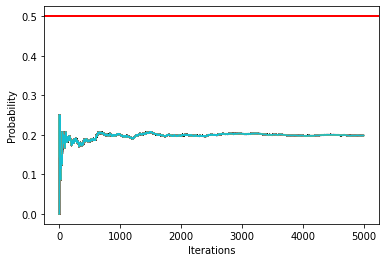

In [ ]:
answer = monte_carlo(5000)
print("Valor final de probabilidade de sair coroa (1) :",answer)

## Jogo de dados
Vamos simular um jogo de dados usando Monte Carlo. Nosso jogo simples envolver√° dois dados. Para ganhar, o jogador precisa obter o mesmo n√∫mero em ambos os dados lan√ßados juntos. Um dado de seis faces tem seis resultados poss√≠veis (1, 2, 3, 4, 5 e 6). Com dois dados, tem-se 36 resultados poss√≠veis (1 e 1, 1 e 2, 1 e 3, etc., ou 6 x 6 = 36 possibilidades - se voc√™ n√£o enxerga as 36 combina√ß√µes, veja os slides da aula). Neste jogo, a casa tem mais oportunidades de ganhar (30 resultados vs. 6 resultados do jogador), o que significa que a casa tem a vantagem.

 Digamos que nosso jogador tenha um saldo inicial de  $R\$ 1000,00$ e esteja preparado para perder tudo. Ent√£o, ele aposta $R\$ 1,00$ em cada lan√ßamento e decide tentar a sorte em $1000$ lan√ßamentos. Como a casa √© muito generosa, ela oferece o pagamento de $4$ vezes a aposta do jogador quando o jogador ganha. Portanto, se o jogador milagrosamente fizer uma sequ√™ncia de $1000$ vit√≥rias em $1000$ lan√ßamentos, pode voltar para casa com $R\$ 5000,00$. Se perder todas as rodadas, volta para casa sem nada. N√£o √© uma m√° rela√ß√£o risco-recompensa... ou √©?

 Analise a resposta (__veja que o problema est√° resolvido abaixo ea resposta foi adaptada do [link](https://towardsdatascience.com/how-to-create-a-monte-carlo-simulation-using-python-c24634a0978a)__).

<img src='https://drive.google.com/uc?export=view&id=1p8Pe00sjYaj_dNu5IUCao4U6VpeBPm0n' width="400">

Em cada simula√ß√£o de Monte Carlo - ali√°s, todo problema que se tenta resolver - voc√™ precisa definir quais s√£o as entradas e quais informa√ß√µes voc√™ deseja obter. J√° definimos quais s√£o nossas entradas, dissemos que o n√∫mero de lan√ßamentos em cada jogada √© 1000 (`max_num_rolls = 1000`), e o valor que o jogador apostar√° em cada lan√ßamento √© de R\$ 1 (`bet = 1`). Al√©m das vari√°veis de entrada, √© necess√°rio definir quantas vezes o jogo ser√° simulado. A vari√°vel `num_simulations` armazernar√° o n√∫mero de simula√ß√µes de Monte Carlo a serem feitas. Quanto maior for esse n√∫mero, mais precisa ser√° a probabilidade prevista em rela√ß√£o ao seu valor verdadeiro.

O n√∫mero de vari√°veis de rastreamento geralmente aumenta com a complexidade de um projeto. Para este exemplo, ser√£o utilizadas duas vari√°veis: a probabilidade de vit√≥ria armazenada na vari√°vel `win_probability` (vit√≥rias por jogo divididas pelo n√∫mero total de jogadas) e o saldo final de cada simula√ß√£o (ou jogo) armazenado na vari√°vel `end_balance`.

In [81]:
# Dados de entrada e de rastreamento

# Inputs
num_simulations = 10000
max_num_rolls = 1000
bet = 1

# Tracking
win_probability = []
end_balance = []

In [82]:
# Criar a fun√ß√£o de lan√ßamento artificial
def roll_dice():
    die_1 = random.randint(1, 6)
    die_2 = random.randint(1, 6)

    # Determinar se os dados t√™m o mesmo n√∫mero
    if die_1 == die_2:
        same_num = True
    else:
        same_num = False
    return same_num

In [ ]:
# Creating Figure for Simulation Balances
fig = plt.figure()
plt.title('Monte Carlo para lan√ßamento de dados [' + str(num_simulations) + ' simula√ß√µes]')
plt.xlabel("Lan√ßamento")
plt.ylabel("Balan√ßo [R$]")
plt.xlim([0, max_num_rolls])

win_probability = []
end_balance = []
# Loop para o n√∫mero de simula√ß√µes desejadas 'num_simulations'
for i in range(num_simulations):
    balance = [1000]
    num_rolls = [0]
    num_wins = 0
    # Lan√ßamento at√© que o jogador tenha lan√ßado 'max_num_rolls' vezes
    while num_rolls[-1] < max_num_rolls:
        same = roll_dice()
        # Resultado se os dados forem do mesmo n√∫mero
        if same:
            balance.append(balance[-1] + 4 * bet)
            num_wins += 1
        # Resultado se os dados forem de n√∫meros diferentes
        else:
            balance.append(balance[-1] - bet)

        num_rolls.append(num_rolls[-1] + 1)
# Armazenar vari√°veis de rastreamento e adicionar linha √† figura
    win_probability.append(num_wins/num_rolls[-1])
    end_balance.append(balance[-1])
    plt.plot(num_rolls, balance)

In [ ]:
# Mostrar o gr√°fico ap√≥s a conclus√£o das simula√ß√µes
fig = plt.figure()
area = [i * 200 for i in win_probability]
axis = plt.scatter(list(range(num_simulations)), end_balance,  s=area, c =win_probability, alpha = 0.6 )
plt.title('Monte Carlo para lan√ßamento de dados [' + str(num_simulations) + ' simula√ß√µes]')
plt.xlabel("Jogada")
plt.ylabel("Balan√ßo Final [R$]")
plt.xlim([0, max_num_rolls])
#cbar = fig.colorbar(axis,ticks=[0,0.5,1])
plt.colorbar(label='Probabilidade de vit√≥ria')
plt.show()

# Probabilidade de vit√≥ria m√©dia e saldo final
overall_win_probability = sum(win_probability)/len(win_probability)
overall_end_balance = sum(end_balance)/len(end_balance)
# Exibir as m√©dias
print('Probabilidade m√©dia de vit√≥ria ap√≥s {:8d} jogadas: {:5.4f}'.format(num_simulations,overall_win_probability))
print('Saldo final m√©dio ap√≥s {:8d} jogadas: R$ {:6.2f}'.format(num_simulations,overall_end_balance))

A partir de nossa figura, podemos determinar que o jogador raramentese  obt√©m lucro ap√≥s 1000 jogadas. Na verdade, o saldo final m√©dio das 10.000 simula√ß√µes √© de, aprox., R$ 834. Assim, mesmo que a casa tenha sido _generosa_ em pagar 4 vezes a aposta quando o jogador ganhou, ela ainda saiu por cima.

Outra importante an√°lise √© acerca da probabilidade de vit√≥ria  de, ~0.1667, ou aproximadamente 1/6. Lembre-se que foi comentado anteriormente que o jogador pode vencer com 6 poss√≠veis resultados e que existem 36 lan√ßamentos poss√≠veis. Usando esses dois n√∫meros, esperar√≠amos que o jogador ganhasse 6 das 36 jogadas, ou 1/6 das jogadas, o que corresponde √† nossa previs√£o de Monte Carlo.

# Sua li√ß√£o de casa

<img src='https://drive.google.com/uc?export=view&id=1_1jsA41H4nNIgig_4HGoq0BPhksHkm0W' width="400">


Antes de fazer a li√ß√£o, estude a aula.

1. Uma empresa que oferece uma ferramenta de gerenciamento de tarefas baseada em navegador pretende fazer publicidade direcionada com base nos navegadores das pessoas. Os dados que eles coletaram sobre seus usu√°rios est√£o descritos na tabela abaixo.

![Browsers](https://drive.google.com/uc?export=view&id=1isVuH0xFeeo1mNfBnZ3wacy-zw1VAybc)

 * Ache:
  * P(Premium | Chrome) ‚Äî a probabilidade de um usu√°rio escolhido aleatoriamente ter uma assinatura premium, dado que seu navegador √© o Chrome. Atribua sua resposta a `p_premium_dado_chrome`.
  * P(Basic | Safari) ‚Äî a probabilidade de que um usu√°rio escolhido aleatoriamente tenha uma assinatura b√°sica, dado que seu navegador √© o Safari. Atribua sua resposta a `p_basic_dado_safari`.
  * P(Free | Firefox)} ‚Äî a probabilidade de que um usu√°rio escolhido aleatoriamente tenha uma assinatura gratuita, dadoque seu navegador √© o Firefox. Atribua sua resposta a `p_free_dado_firefox`.
  * Entre um usu√°rio do Chrome e um usu√°rio do Safari, quem tem mais probabilidade de ter uma assinatura premium? Se voc√™ acha que um usu√°rio do Chrome √© a resposta, atribua a string 'Chrome' a uma vari√°vel chamada `more_likely_premium`, caso contr√°rio, atribua 'Safari'. Para resolver este exerc√≠cio, voc√™ tamb√©m precisar√° calcular P(Premium | Safari).

2. O M&M azul foi lan√ßado em 1995. Antes disso, a mistura de cores em um saco de M&Ms simples era (30% Marrom, 20% Amarelo, 20% Vermelho, 10% Verde, 10% Laranja, 10% Castanho). Depois ficou (24% Azul, 20% Verde, 16% Laranja, 14% Amarelo, 13% Vermelho, 13% Marrom).
Um amigo meu tem dois sacos de M&Ms, e ele me diz que um √© de 1994 e outro de 1996. Ele n√£o me diz qual √© qual, mas me d√° um M&M de cada saco. Um √© amarelo e o outro √© verde. Qual √© a probabilidade de que o M&M amarelo tenha vindo da sacola de 1994?

3. Analise o problema de infer√™ncia estat√≠stica, do lan√ßamento de moedas, diminuindo o n√∫mero de lan√ßamentos do exemplo. Depois, simule que voc√™ retirou a moeda honesta e refa√ßa a an√°lise.

5. Com rela√ß√£o ao exemplo do jogo de dados usando Monte Carlo. Refa√ßa para 3 dados e tire suas conclus√µes.